# IDS ASSIGNMENT :- WEB SCRAPING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import requests
import bs4
from bs4 import BeautifulSoup
import re 
import math
import json

<b>(A) DATA ACQUISITION<b>

<b>1. RELIANCE JIOMART<b> 

In [2]:
t = []
y = []
d = []
for i in range(1,3):
 url = "https://www.jiomart.com/c/groceries/fruits-vegetables/219/page/"+str(i)
 result = requests.get(url)
 sp = BeautifulSoup(result.text,'html.parser')
 t = sp.find("div", class_ = "row product-list")
 z = [x.get_text() for x in t.findAll("span", class_ = "clsgetname")]
 y = [x.get_text() for x in t.findAll("span", id = "final_price")]
 x = [str(sub.split('₹')[1]) for sub in y] ## Remove speical characters and fetch only price numbers
 d = [d.strip(' ') for d in x] ## Remove spaces from list
 data_note_8 = pd.DataFrame({"Name":z, "Prices": d})
data_note_8

Name  Prices
0                   Tomato per kg   35.00
1                 Musk Melon 1 kg   70.00
2             Ginger Indian 200 g   19.80
3                      Onion-1 kg   48.00
4   Kiwi Gold Zespri 3 Piece Pack  129.00
5            Green Capsicum 500 g   60.00
6               Sweet Potato 1 kg   94.00
7                   Lemon - 100 g    8.80
8         Chilli Green - 200 gram   21.80
9                  Beetroot 500 g   39.00
10   Arbi (Colocasia) Small 500 g   29.00
11        Kundri (Coccinia) 500 g   40.00
12             Onion Sambhar 1 kg  124.00
13             Lemongrass 1 bunch   20.00

<b>2. DMART<b> 

In [3]:
t = []

y = []

Platform = []

url = "https://www.dmart.in/fruits---vegetables-aesc-fruitsandvegetablescore"

result = requests.get(url)

sp = BeautifulSoup(result.text,'html.parser')

z = [x.get_text() for x in sp.findAll("h4", class_ = "product-listing--title")]

y = [x.get_text() for x in sp.findAll("p", class_ = "product-listing--discounted-price")]

x = [str(sub.split('DMart ')[1]) for sub in y]

n = [str(sub.split(':')[0]) for sub in z]

w = [str(sub.split(':')[1]) for sub in z]

f = [sub.strip(' ') for sub in w]

Platform = 'DMART'

data_note_4 = pd.DataFrame({"Name":n,"Prices": x,"Quantity":f, "Platform":Platform})
data_note_4

Name  Prices  \
0                Apple Royal Gala (Seb)   175.00   
1          Fresh Apple (Seb) Washington   199.00   
2        Fresh Orange (Santra) Imported   179.00   
3                             Fresh Kiwi  112.00   
4              Fresh Pomegranate (Anar)   175.00   
5           Fresh Banana (Kela) Elaichi    56.00   
6                    Apple Shimla (Seb)    99.00   
7            Fresh Sweet Lime (Mosambi)    70.00   
8           Fresh Muskmelon (Kharbooja)    75.00   
9              Raw Banana (Kela) Madras    40.00   
10                     Fresh Sweet Corn    39.00   
11  Fresh Capsicum Green (Shimla Mirch)    28.00   
12                            Raw Mango    56.00   
13            Safal Green Peas (Frozen)   210.00   
14                  Fresh Potato (Aloo)    45.00   
15                  Fresh Onion (Pyaaj)    49.00   
16                              Coconut    34.00   
17                      Garlic (Lahsun)    49.00   
18                       Ginger (Adrak)    38.00   
19                 Fresh Lemon (Nimboo)    13.00   
20         Sambhar Onion (Madras Onion)    82.00   
21               Fresh Cucumber (Kakdi)    16.00   
22           Fresh Lady Finger (Bhendi)    23.00   
23           Fresh Beetroot (Chukandar)    32.00   
24                 Fresh Carrot (Gajar)    30.00   
25               Fresh Colocasia (Arbi)    40.00   
26                 Bottle Gourd (Dudhi)    40.00   
27      Fresh Elephant Foot Yam (Suran)    32.00   
28       Drumsticks (Shevgyacha Shenga)    38.00   
29       Fresh Brinjal (Bharta Baingan)    45.00   
30                Sweet Potato (Ratala)    35.00   
31                 Cabbage (Patta Gobi)    33.00   
32          Fresh Cluster Beans (Gavar)    33.00   
33           Fresh Groundnut (Mungfali)    35.00   
34          Fresh Green Chilli (Mirchi)    10.00   
35              Fresh Tomato (Tamaatar)    16.00   
36                        Fresh Brinjal    28.00   
37        Safal Frozen Mixed Vegetables    55.00   
38         Fresh Green Cucumber (Kakdi)    28.00   
39                Bitter Gourd (Karela)    15.00   

                           Quantity Platform  
0   4 Pieces (Approx. 500 - 750 gm)    DMART  
1   4 Pieces (Approx. 0.7 - 0.9 kg)    DMART  
2   4 Pieces (Approx. 800 - 900 gm)    DMART  
3                          3 Pieces    DMART  
4     4 Pieces (Approx. 0.8 - 1 kg)    DMART  
5                          6 Pieces    DMART  
6   4 Pieces (Approx. 750 - 850 gm)    DMART  
7   4 Pieces (Approx. 800 - 850 gm)    DMART  
8      1 Piece (Approx. 0.7 - 1 kg)    DMART  
9                             4 pcs    DMART  
10                         2 Pieces    DMART  
11                          500 gms    DMART  
12                          400 gms    DMART  
13                             1 kg    DMART  
14                             1 kg    DMART  
15                             1 kg    DMART  
16                           1 Unit    DMART  
17                          200 gms    DMART  
18                          200 gms    DMART  
19                         5 Pieces    DMART  
20                          500 gms    DMART  
21                          500 gms    DMART  
22                          500 gms    DMART  
23                          500 gms    DMART  
24                          500 gms    DMART  
25                          500 gms    DMART  
26                          500 gms    DMART  
27                          500 gms    DMART  
28                          250 gms    DMART  
29                          400 gms    DMART  
30                          500 gms    DMART  
31                          500 gms    DMART  
32                          250 gms    DMART  
33                          250 gms    DMART  
34                          100 gms    DMART  
35                          500 gms    DMART  
36                          500 gms    DMART  
37                          500 gms    DMART  
38                          500 gms    DMART  
39                     

<b>3. GROFERS<b> 

In [4]:
t = []
y = []
url = "https://grofers.com/cn/vegetables-fruits/cid/1487"
result = requests.get(url)
sp = BeautifulSoup(result.text,'html.parser')
print(sp)

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Access denied | grofers.com used Cloudflare to restrict access</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/main.css" id="cf_styles-css" media="screen,projection" rel="stylesheet" type="text/css"/>
</head>
<body>
<div id="cf-wrapper">
<div class="cf-alert cf-alert-error cf-cookie-error hidden" data-translate="enable_cookies" id="cookie-alert">Please enable cookies.</div>
<div class="p-0" id="cf-error

<b>4. PAYTMMALL<b> 

In [5]:
url = 'https://middleware.paytmmall.com/fmcg-foods-glpid-101405'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
payload = {

'channel': 'web',

'child_site_id': '6',

'site_id': '2',

'version': '2',

'discoverability': 'online',

'use_mw': '1',

'category': '180899',

'page': '1',

'page_count': '1',

'items_per_page': '32'}

 

# Get total pages needed

jsonData = requests.post(url, headers=headers, data=payload).json()

total_count = jsonData['totalCount']

total_pages = total_count / 32

pages = math.ceil(total_pages)

namelist = []

pricelist = []

quantitylist = []

Platform = []

# Iterate through each page

for page in range(1,pages + 1):

    payload.update({'page':page, 'page_count':page})

 

    jsonData = requests.post(url, headers=headers, data=payload).json()

 

    for product in jsonData['grid_layout']:

        name = product['name']

        quantity= (name[-5:])

        actual_price = product['actual_price']

        x = name.split(' ')[1]

        y = name.split(' ')[2]

        pricelist+=[actual_price]

        namelist+=[name]

        quantitylist+=[quantity]

        Platform = 'PaytmMall'
        
data_note_3 = pd.DataFrame({"Name":namelist,"Prices":pricelist,"Quantity":quantitylist, "Platform":Platform})
data_note_3

Name  Prices Quantity  \
0                                     Fresho Onion 1 kg      50     1 kg   
1                 Safal Frozen - Mixed Vegetables 500 g      60    500 g   
2                          Fresho Banana - Robusta 1 kg      30     1 kg   
3                           Fresho Tomato - Hybrid 1 kg      35     1 kg   
4                  Fresho Orange - Nagpur  Regular 1 kg      60     1 kg   
...                                                 ...     ...      ...   
1470                  Fresho Dates Fresh - Yellow, 1 kg     498     1 kg   
1471   Fresho Pine Apple - Premium  Institutional 20 kg     100    20 kg   
1472                  Fresho Sprouts - Horse Gram 200 g      21    200 g   
1473  Fresho Carrots Sliced, Broccoli Florets and Ca...      71    220 g   
1474                             Fresho Fresh Figs 1 kg     686     1 kg   

       Platform  
0     PaytmMall  
1     PaytmMall  
2     PaytmMall  
3     PaytmMall  
4     PaytmMall  
...         ...  
1470  PaytmMall  
1471  PaytmMall  
1472  PaytmMall  
1473  PaytmMall  
1474  PaytmMall  

[1475 rows x 4 columns]

<b>5. BIGBASKET<b> 

In [6]:
output = []

pricelist = []

namelist = []

Quantity = []

Platform = []

for i in range(2,12):

   url = "https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page="+str(i)+"&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc"

   link1 = requests.get(url)

   data = json.loads(link1.text)

   data = data ["tab_info"] ["product_map"] ["all"] ["prods"]

   for m in range (len(data)):

    data1=data[m]

    price= data1 ["sp"]

    name = data1 ["p_desc"]

    weight = data1 ["w"]

    pricelist+=[price]

    namelist+=[name]

    Quantity+=[weight]

    Platform = 'BigBasket'

data_note_2 = pd.DataFrame({"Name":namelist,"Prices":pricelist,"Quantity":Quantity,"Platform":Platform})
data_note_2

Name Prices       Quantity   Platform
0    Chilli - Green Long, Medium   6.44          100 g  BigBasket
1               Banana - Robusta  24.00           1 kg  BigBasket
2                       Beetroot  33.66          500 g  BigBasket
3                        Cabbage  59.00           1 pc  BigBasket
4                         Ginger  22.28          250 g  BigBasket
..                           ...    ...            ...        ...
195         Grape Fruit - Indian  76.00           1 pc  BigBasket
196                  Yam - Diced  20.00          200 g  BigBasket
197            Lettuce - Romaine  16.00  100 to 150 gm  BigBasket
198         Sprouts - Horse Gram  17.00          200 g  BigBasket
199             Carrots - Grated  83.00          200 g  BigBasket

[200 rows x 4 columns]

<b>6. AMAZON PANTRY<b> 

In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}

t = []

y = []

url = "https://www.amazon.in/alm/category/?_encoding=UTF8&almBrandId=More&node=4859496031&ref_=sv_more_5"

result = requests.get(url, headers=headers)

sp = BeautifulSoup(result.text,'html.parser')

t = [x.a.get('title') for x in sp.findAll("div", class_ = "a-box-group a-spacing-top-micro")]

y = [x.get_text() for x in sp.findAll("span", class_ = "a-size-base a-color-price kepler-widget-price")]

x = [str(sub.split(',')[0]) for sub in t]

z = [str(sub.split(',')[-1]) for sub in t]

f = [sub.strip(' ') for sub in z]

k = [str(sub.split('₹')[-1]) for sub in y]

d = [sub.strip('\n') for sub in k]

e = [sub.strip('\xa0') for sub in d]

Platform = 'Amazon Pantry'

data_note_1 = pd.DataFrame({"Name":x, "Prices": e, "Quantity":f, "Platform":Platform})
data_note_1

Name  Prices           Quantity  \
0                                     Fresh Garlic   49.00               250g   
1                      Fresh Produce Lemon - Grass   25.00    30g to 50g Pack   
2                              Fresh Produce Thyme  120.00            1 Bunch   
3                                      Fresh Onion   44.00                1kg   
4                                     Fresh Potato   54.00                1kg   
5                                     Fresh Bhendi   21.00               500g   
6                              Fresh Tomato Hybrid   59.00                1kg   
7                             Fresh Tomato - Local   60.00                1kg   
8                           Fresh Capsicum - Green   49.00               500g   
9                               Fresh Bitter Gourd   27.00               500g   
10                                    Fresh Papaya   80.00            1 Piece   
11                              Fresh Apple Shimla   55.00           4 Pieces   
12                       Fresh Water Melon - Kiran   85.00               1 Pc   
13                               Fresh Pomegranate  229.00           4 Pieces   
14                Fresh Produce Apple - Royal Gala  199.00               500g   
15  Fresh Produce Apple Granny Smith / Green Apple  147.00  4 pcs (530-650gm)   
16                                   Fresh Mosambi   48.00           6 Pieces   
17    TADAA Boiled Sweet Corn Kernel - Chat Masala   39.00              225 g   
18      TADAA Boiled Sweet Corn Kernel - Peri Peri   49.00              225 g   

         Platform  
0   Amazon Pantry  
1   Amazon Pantry  
2   Amazon Pantry  
3   Amazon Pantry  
4   Amazon Pantry  
5   Amazon Pantry  
6   Amazon Pantry  
7   Amazon Pantry  
8   Amazon Pantry  
9   Amazon Pantry  
10  Amazon Pantry  
11  Amazon Pantry  
12  Amazon Pantry  
13  Amazon Pantry  
14  Amazon Pantry  
15  Amazon Pantry  
16  Amazon Pantry  
17  Amazon Pantry  
18  Amazon Pantry

<b>(B) DATA CLEANING & (C) DATA INTEGRATION<b>

In [8]:
#Merging DataFrames in to one Dataframe

data_Total = pd.concat([data_note_1, data_note_2,data_note_3,data_note_4], ignore_index=True)
data_Total.head()

Name  Prices         Quantity       Platform
0                 Fresh Garlic   49.00             250g  Amazon Pantry
1  Fresh Produce Lemon - Grass   25.00  30g to 50g Pack  Amazon Pantry
2          Fresh Produce Thyme  120.00          1 Bunch  Amazon Pantry
3                  Fresh Onion   44.00              1kg  Amazon Pantry
4                 Fresh Potato   54.00              1kg  Amazon Pantry

In [9]:
data_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1734 non-null   object
 1   Prices    1734 non-null   object
 2   Quantity  1734 non-null   object
 3   Platform  1734 non-null   object
dtypes: object(4)
memory usage: 54.3+ KB


In [10]:
# Adding additional features 

data_Total["Keyword"]=data_Total["Name"]

data_Total['Unit']= data_Total['Quantity']

data_Total.head()


Name  Prices         Quantity       Platform  \
0                 Fresh Garlic   49.00             250g  Amazon Pantry   
1  Fresh Produce Lemon - Grass   25.00  30g to 50g Pack  Amazon Pantry   
2          Fresh Produce Thyme  120.00          1 Bunch  Amazon Pantry   
3                  Fresh Onion   44.00              1kg  Amazon Pantry   
4                 Fresh Potato   54.00              1kg  Amazon Pantry   

                       Keyword             Unit  
0                 Fresh Garlic             250g  
1  Fresh Produce Lemon - Grass  30g to 50g Pack  
2          Fresh Produce Thyme          1 Bunch  
3                  Fresh Onion              1kg  
4                 Fresh Potato              1kg

In [11]:
data_Total.loc[data_Total['Keyword'].str.contains('Onion'), 'Keyword'] = 'Onion'

data_Total.loc[data_Total['Keyword'].str.contains('Ginger'), 'Keyword'] = 'Ginger'

data_Total.loc[data_Total['Keyword'].str.contains('Garlic'), 'Keyword'] = 'Garlic'

data_Total.loc[data_Total['Keyword'].str.contains('Cucumber'), 'Keyword'] = 'Cucumber'

data_Total.loc[data_Total['Keyword'].str.contains('Brinjal'), 'Keyword'] = 'Brinjal'

data_Total.loc[data_Total['Keyword'].str.contains('Capsicum'), 'Keyword'] = 'Capsicum'

data_Total.loc[data_Total['Keyword'].str.contains('Lady Finger'), 'Keyword'] = 'Lady Finger'

data_Total.loc[data_Total['Keyword'].str.contains('Beetroot'), 'Keyword'] = 'Beetroot '

data_Total.loc[data_Total['Keyword'].str.contains('Carrot'), 'Keyword'] = 'Carrot'

data_Total.loc[data_Total['Keyword'].str.contains('Potato'), 'Keyword'] = 'Potato'

data_Total.loc[data_Total['Keyword'].str.contains('Colocasia'), 'Keyword'] = 'Colocasia'

data_Total.loc[data_Total['Keyword'].str.contains('Beans'), 'Keyword'] = 'Beans'

data_Total.loc[data_Total['Keyword'].str.contains('Tomato'), 'Keyword'] = 'Tomato'

data_Total.loc[data_Total['Keyword'].str.contains('Cabbage'), 'Keyword'] = 'Cabbage'

data_Total.loc[data_Total['Keyword'].str.contains('Bitter Gourd'), 'Keyword'] = 'Bitter Gourd'

data_Total.loc[data_Total['Keyword'].str.contains('Green Chilli'), 'Keyword'] = 'Green Chilli'

data_Total.head()

Name  Prices         Quantity       Platform  \
0                 Fresh Garlic   49.00             250g  Amazon Pantry   
1  Fresh Produce Lemon - Grass   25.00  30g to 50g Pack  Amazon Pantry   
2          Fresh Produce Thyme  120.00          1 Bunch  Amazon Pantry   
3                  Fresh Onion   44.00              1kg  Amazon Pantry   
4                 Fresh Potato   54.00              1kg  Amazon Pantry   

                       Keyword             Unit  
0                       Garlic             250g  
1  Fresh Produce Lemon - Grass  30g to 50g Pack  
2          Fresh Produce Thyme          1 Bunch  
3                        Onion              1kg  
4                       Potato              1kg

In [12]:
#Creating the list of Selected Vegitables for filtering 

Vegetable_list = ['Onion','Ginger','Garlic', 'Cucumber','Brinjal','Capsicum','Potato','Tomato','Cabbage','Bitter Gourd','Green Chilli','Lady Finger','Beetroot ','Carrot','Colocasia','Beans']
data_Total = data_Total[data_Total['Keyword'].isin(Vegetable_list)]
 

In [13]:
# Converting Quantity to Numeric Values 

data_Total["Quantity"]= data_Total["Quantity"].str.replace("1 kg", "1000")
data_Total["Quantity"]= data_Total["Quantity"].str.replace("1kg", "1000")
data_Total["Quantity"]= data_Total["Quantity"].str.replace("2kg", "2000")
data_Total["Quantity"]= data_Total["Quantity"].str.replace("2 kg", "2000")

data_Total["Quantity"]= data_Total["Quantity"].str.replace("[^0-9]", "")

data_Total['Quantity']= pd.to_numeric(data_Total['Quantity'],errors='coerce')
data_Total = data_Total[data_Total['Quantity']>0]
data_Total.head()

Name Prices  Quantity       Platform Keyword  Unit
0          Fresh Garlic  49.00     250.0  Amazon Pantry  Garlic  250g
3           Fresh Onion  44.00    1000.0  Amazon Pantry   Onion   1kg
4          Fresh Potato  54.00    1000.0  Amazon Pantry  Potato   1kg
6   Fresh Tomato Hybrid  59.00    1000.0  Amazon Pantry  Tomato   1kg
7  Fresh Tomato - Local  60.00    1000.0  Amazon Pantry  Tomato   1kg

In [14]:
# Converting Units 

data_Total.loc[data_Total['Unit'].str.contains('kg'), 'Unit'] = 'g'
data_Total.loc[data_Total['Unit'].str.contains('g'), 'Unit'] = 'g'
data_Total.loc[data_Total['Unit'].str.contains('pc'), 'Unit'] = 'pc'
data_Total.loc[data_Total['Unit'].str.contains('Pieces'), 'Unit'] = 'pc'
data_Total.loc[data_Total['Unit'].str.contains('Piece'), 'Unit'] = 'pc'
data_Total.loc[data_Total['Unit'].str.contains('Stems'), 'Unit'] = 'pc'
data_Total.loc[data_Total['Unit'].str.contains('Gm'), 'Unit'] = 'g'
data_Total.loc[data_Total['Unit'].str.contains('Mola'), 'Unit'] = 'Mola'
data_Total.loc[data_Total['Unit'].str.contains('Unit'), 'Unit'] = 'pc'
data_Total.loc[data_Total['Unit'].str.contains('Bunch'), 'Unit'] = 'Bunch'
data_Total.head()

Name Prices  Quantity       Platform Keyword Unit
0          Fresh Garlic  49.00     250.0  Amazon Pantry  Garlic    g
3           Fresh Onion  44.00    1000.0  Amazon Pantry   Onion    g
4          Fresh Potato  54.00    1000.0  Amazon Pantry  Potato    g
6   Fresh Tomato Hybrid  59.00    1000.0  Amazon Pantry  Tomato    g
7  Fresh Tomato - Local  60.00    1000.0  Amazon Pantry  Tomato    g

In [15]:
# Adding Additional feature Price per gram

Unit_Gram = ['g']
data_Total = data_Total[data_Total['Unit'].isin(Unit_Gram)]
data_Total['Prices'] = pd.to_numeric(data_Total['Prices'],errors='coerce')
data_Total['Quantity'] = pd.to_numeric(data_Total['Quantity'],errors='coerce')
data_Total['Price per gram']= data_Total['Prices']/data_Total['Quantity']
data_Total.head()

Name  Prices  Quantity       Platform Keyword Unit  \
0          Fresh Garlic    49.0     250.0  Amazon Pantry  Garlic    g   
3           Fresh Onion    44.0    1000.0  Amazon Pantry   Onion    g   
4          Fresh Potato    54.0    1000.0  Amazon Pantry  Potato    g   
6   Fresh Tomato Hybrid    59.0    1000.0  Amazon Pantry  Tomato    g   
7  Fresh Tomato - Local    60.0    1000.0  Amazon Pantry  Tomato    g   

   Price per gram  
0           0.196  
3           0.044  
4           0.054  
6           0.059  
7           0.060

<b>(D) EXPLORATORY DATA ANALYSIS AND RECOMMENDATION<b>

Text(0.5, 1.0, 'Distibution of Products in the E-commerce sites')

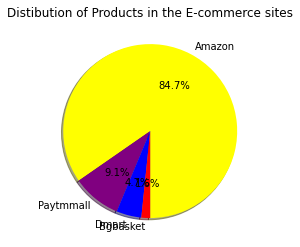

In [16]:
# Distibution of Products in the E-commerce sites 
    
sizes = data_Total['Platform'].value_counts(sort = True)
colors = ["yellow","purple","blue","red"] 
plt.pie(sizes, labels=["Amazon", "Paytmmall", "Dmart","Bgbasket"], colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=270)
plt.title('Distibution of Products in the E-commerce sites')

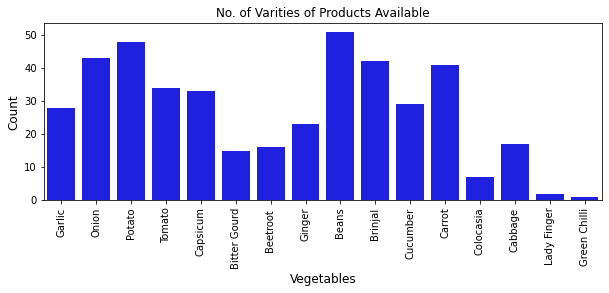

In [17]:
# No. of Varities of Products Available


plt.figure(figsize=(10,15))
plt.subplot(411)
unique_prod = data_Total['Keyword'].unique()
sns.countplot(x="Keyword", data=data_Total , order = unique_prod, color="blue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Vegetables', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Varities of Products Available", fontsize=12)
plt.show()


In [18]:
unique_product_in_platform= data_Total.groupby('Platform')['Keyword'].unique()
print(unique_product_in_platform)

Platform
Amazon Pantry    [Garlic, Onion, Potato, Tomato, Capsicum, Bitt...
BigBasket        [Beetroot , Ginger, Beans, Brinjal, Cucumber, ...
DMART            [Capsicum, Potato, Onion, Garlic, Ginger, Cucu...
PaytmMall        [Onion, Tomato, Potato, Capsicum, Ginger, Beet...
Name: Keyword, dtype: object


In [20]:
##Program to recommend the Platform to buy a purticular Vegetable

Key_text = "Garlic"
print("------------------------------------------------------------------------------------------------------------------")
data_filtered= data_Total[data_Total['Keyword']==Key_text]
minvaluerow = data_filtered['Price per gram'].idxmin()
print ("Chepest Platform to buy the selected vegetable")
data =data_filtered.loc[[minvaluerow]]
print(data['Platform'])
print("\n")
print ("Details:")
print(data)
print("------------------------------------------------------------------------------------------------------------------")
print ("Other Platform Avilable options")
print (data_filtered)

------------------------------------------------------------------------------------------------------------------
Chepest Platform to buy the selected vegetable
114    BigBasket
Name: Platform, dtype: object


Details:
                Name  Prices  Quantity   Platform Keyword Unit  Price per gram
114  Garlic - Peeled   129.0    3100.0  BigBasket  Garlic    g        0.041613
------------------------------------------------------------------------------------------------------------------
Other Platform Avilable options
                                                   Name  Prices  Quantity  \
0                                          Fresh Garlic    49.0     250.0   
31                                               Garlic    44.0     250.0   
84                           Garlic - Organically Grown    80.0     250.0   
114                                     Garlic - Peeled   129.0    3100.0   
243                                  Fresho Garlic 250g    48.0     250.0   
363          

In [21]:
##Program to recommend the Platform to buy a purticular Vegetable

Key_text = "Onion"
print("------------------------------------------------------------------------------------------------------------------")
data_filtered= data_Total[data_Total['Keyword']==Key_text]
minvaluerow = data_filtered['Price per gram'].idxmin()
print ("Chepest Platform to buy the selected vegetable")
data =data_filtered.loc[[minvaluerow]]
print(data['Platform'])
print("\n")
print ("Details:")
print(data)
print("------------------------------------------------------------------------------------------------------------------")
print ("Other Platform Avilable options")
print (data_filtered)

------------------------------------------------------------------------------------------------------------------
Chepest Platform to buy the selected vegetable
866    PaytmMall
Name: Platform, dtype: object


Details:
                                       Name  Prices  Quantity   Platform  \
866  Fresho Red Onion Skinned - Peeled 1 kg    38.0    1000.0  PaytmMall   

    Keyword Unit  Price per gram  
866   Onion    g           0.038  
------------------------------------------------------------------------------------------------------------------
Other Platform Avilable options
                                                   Name   Prices  Quantity  \
3                                           Fresh Onion    44.00    1000.0   
42                                         Spring Onion    14.00     100.0   
53                                      Onion - Sambhar    18.32     250.0   
175                               Sambar Onion - Peeled    34.00     200.0   
219                 

In [22]:
#Program to recommend the Platform to buy a purticular Vegetable :- KEY TEXT VALUE TO BE GIVEN BY USER 

Key_text = input ("Vegetable name: like Garlic,Tomato : ")
print("------------------------------------------------------------------------------------------------------------------")
data_filtered= data_Total[data_Total['Keyword']==Key_text]
minvaluerow = data_filtered['Price per gram'].idxmin()
print ("Chepest Platform to buy the selected vegetable")
data =data_filtered.loc[[minvaluerow]]
print(data['Platform'])
print("\n")
print ("Details:")
print(data)
print("------------------------------------------------------------------------------------------------------------------")
print ("Other Platform Avilable options")
print (data_filtered)

Vegetable name: like Garlic,Tomato : Tomato
------------------------------------------------------------------------------------------------------------------
Chepest Platform to buy the selected vegetable
386    PaytmMall
Name: Platform, dtype: object


Details:
                            Name  Prices  Quantity   Platform Keyword Unit  \
386  Fresho Tomato - Diced 500 g    10.0     500.0  PaytmMall  Tomato    g   

     Price per gram  
386            0.02  
------------------------------------------------------------------------------------------------------------------
Other Platform Avilable options
                                                   Name  Prices  Quantity  \
6                                   Fresh Tomato Hybrid    59.0    1000.0   
7                                  Fresh Tomato - Local    60.0    1000.0   
95                   Tomato - Hybrid, Organically Grown    36.0    1000.0   
181                                     Tomato - Cherry    36.0     250.0   
222